In [1]:
%load_ext autoreload
%autoreload 2

import torch
import src.lvm as lvm
import src.data as data
import src.visualization as visualization
torch.set_default_dtype(torch.double)

from typing import List
import numpy as np

# Data and Model loading

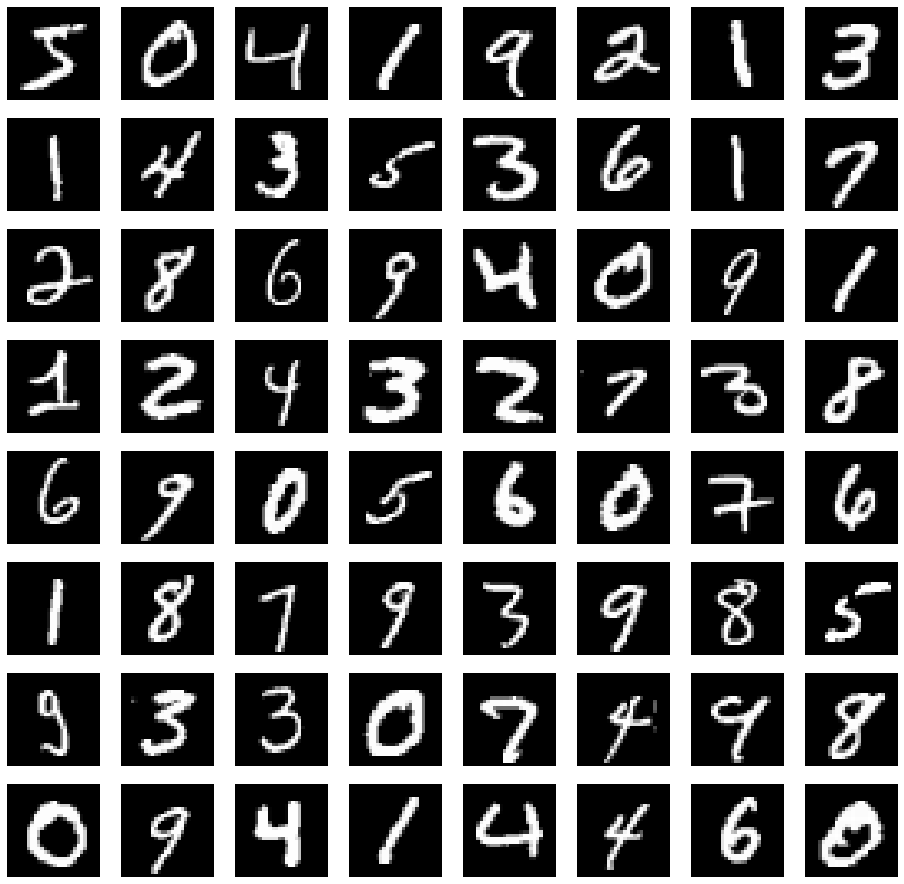

In [2]:
D = data.load_image_data_flat()
visualization.show_image_data_flat(D)

In [3]:
model = lvm.ImageDataModel(device=lvm.DEVICE, z_dim=2)
model.load_state_dict(torch.load("model/image_model_vi_final.pt"))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer.load_state_dict(torch.load("model/image_optimizer_vi_final.pt"))

# Optimization

In [4]:
lvm.image_optimize(model=model, optimizer=optimizer, data=D, epochs=10, report_at=1, sample_size_z=128, variational=True)

0 objective tensor(-6.3198) tensor([0.])
1 objective tensor(-7.8751) tensor([0.])
2 objective tensor(-5.0764) tensor([0.])
3 objective tensor(-5.9227) tensor([0.])
4 objective tensor(-5.0405) tensor([0.])
5 objective tensor(-6.8835) tensor([0.])
6 objective tensor(-5.4818) tensor([0.])
7 objective tensor(-6.3087) tensor([0.])
8 objective tensor(-4.3064) tensor([0.])
9 objective tensor(-4.7033) tensor([0.])


# Evaluation of optimized Model

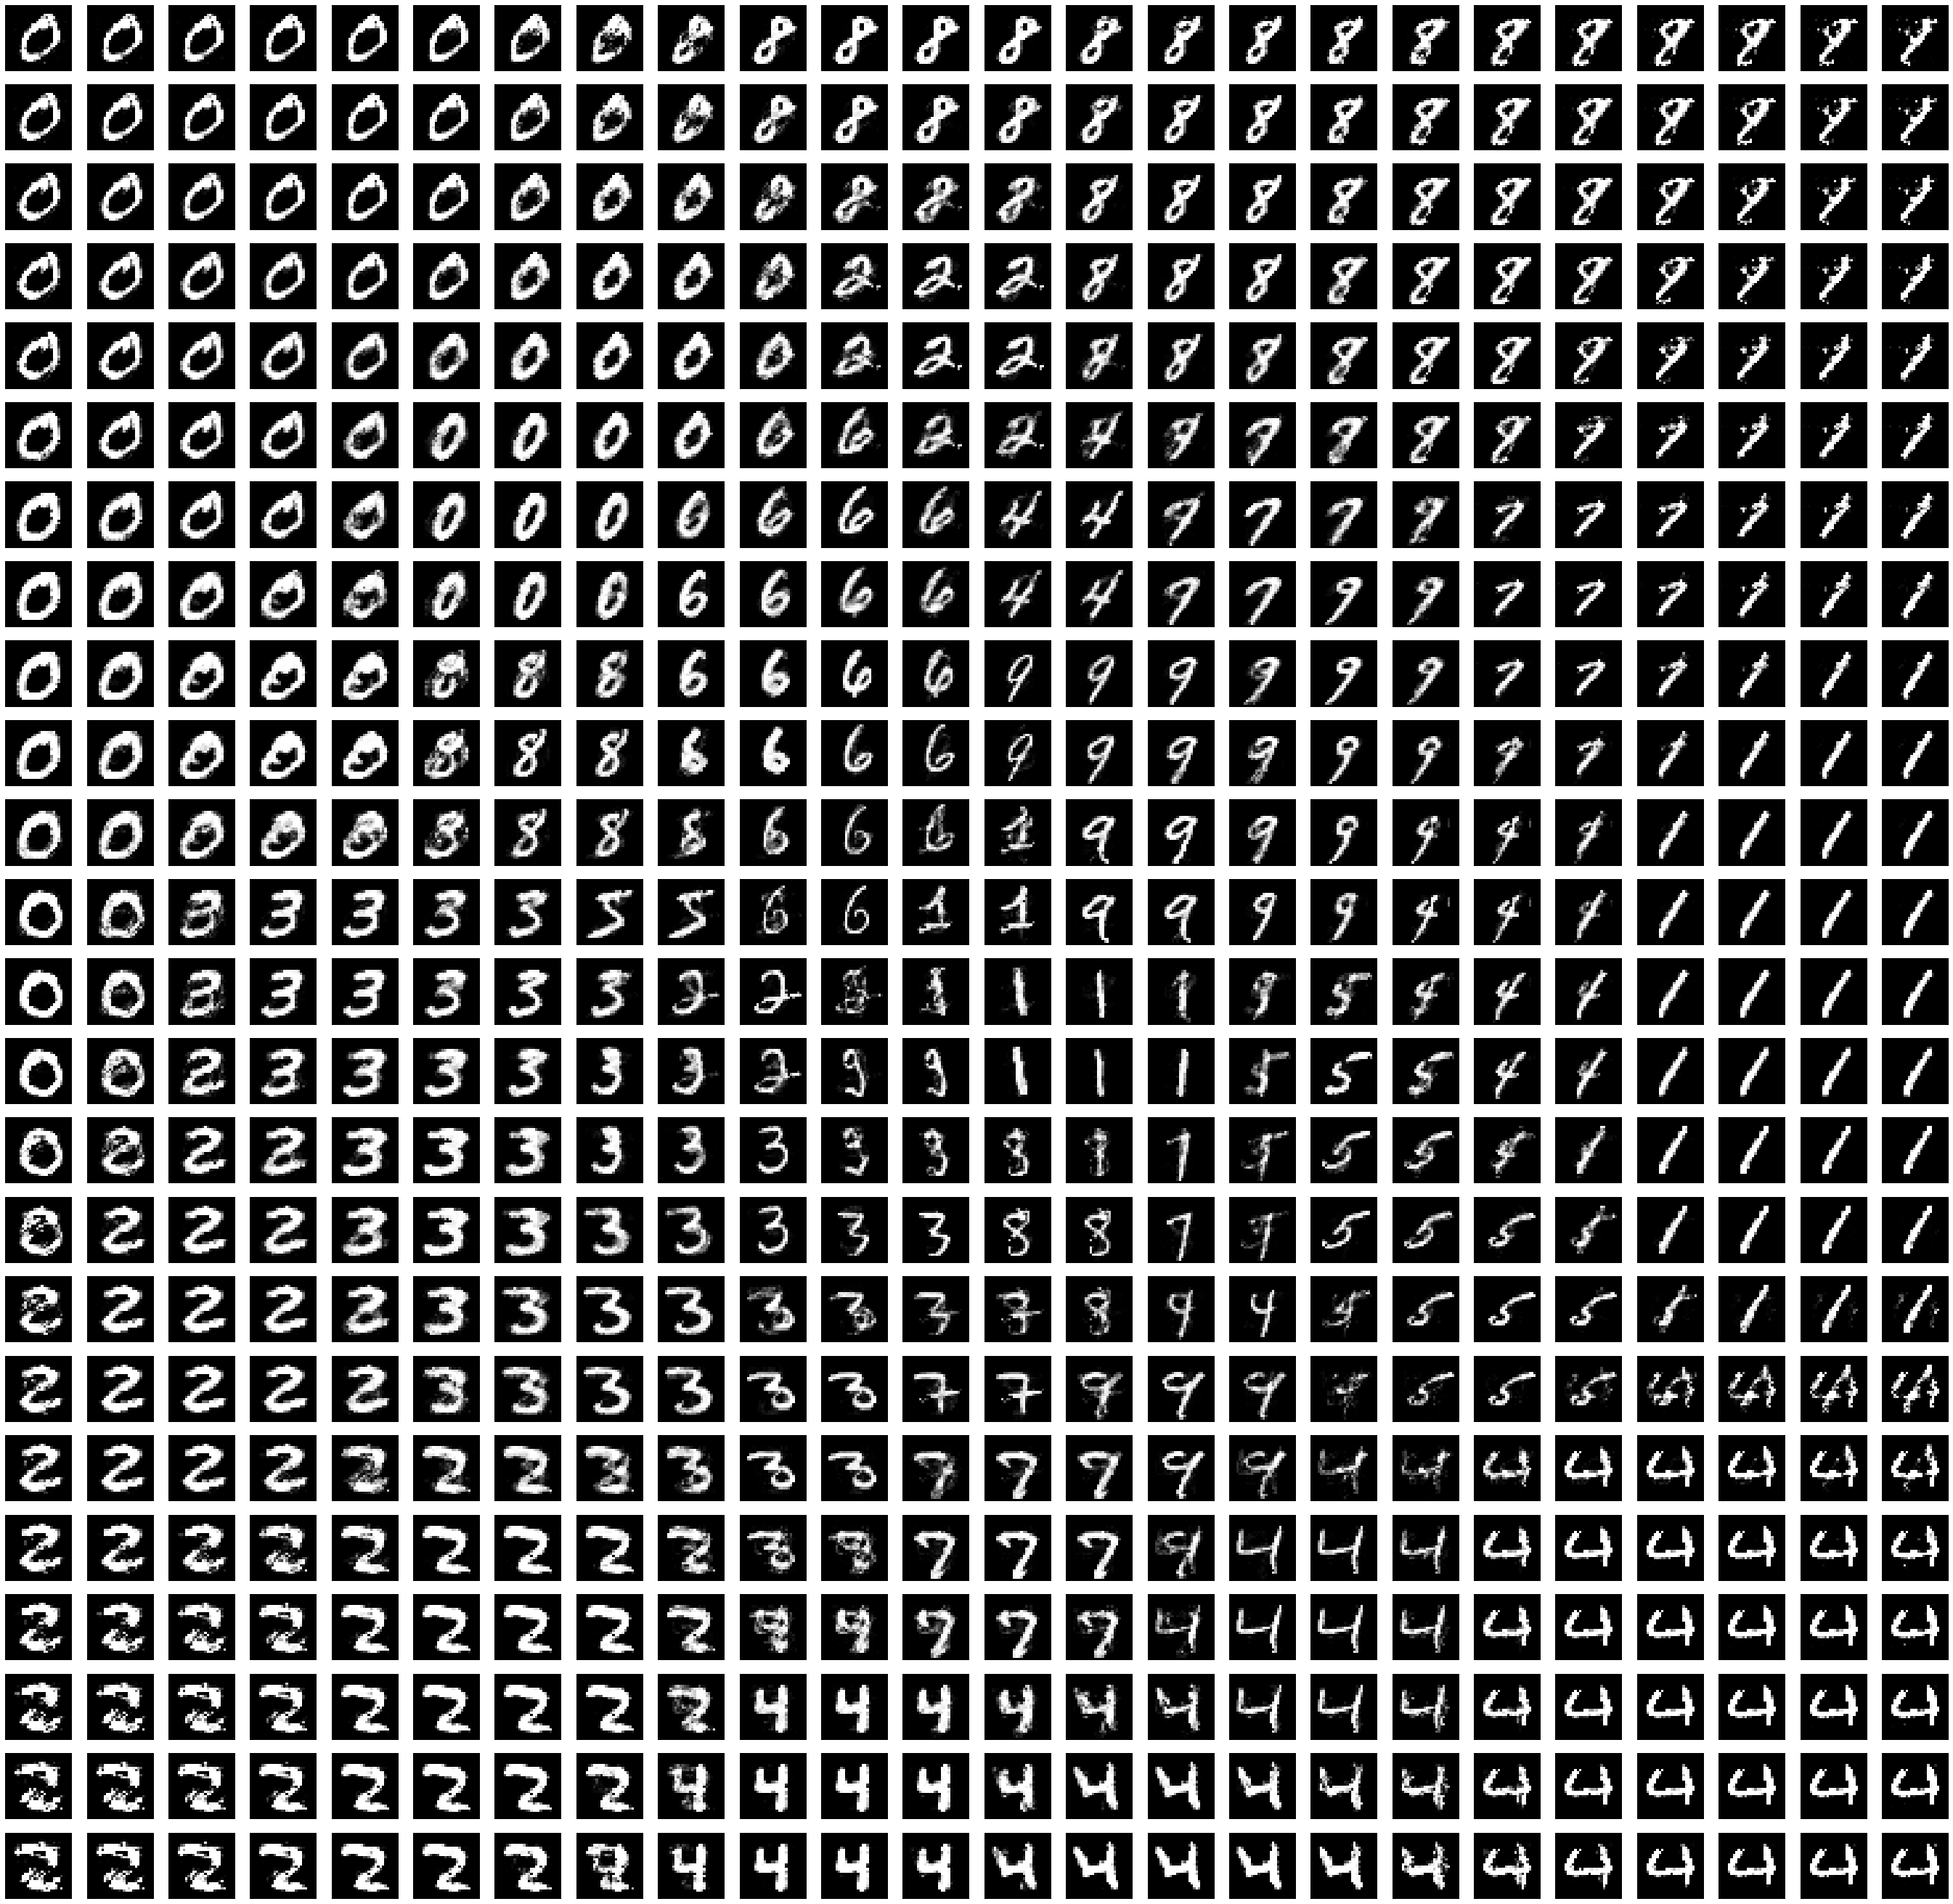

In [5]:
z = lvm.get_grid(axis_scale=np.linspace(-2, 2, 24)).reshape((-1, 2))
D_z_gen = model.f(torch.from_numpy(z)).detach()
visualization.show_image_data_flat(D_z_gen)